In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
trainDf = pd.read_csv('trainingDf.csv') 
testDf = pd.read_csv('testingDf.csv')

## Feature Engineering and Storytelling    

In [38]:
trainDf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,AgeNew_26-35,AgeNew_36-45,AgeNew_51+,OccupationNew_0-2,OccupationNew_3-5,OccupationNew_6-8,OccupationNew_9-11,OccupationNew_12-14,OccupationNew_15-17,OccupationNew_18-20
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Metrics by User

In [39]:
i = 0
users = {}

# Creates a count dictionary that stores the user_ID as the key and
# a dictionary as the value. This dictionary stores the product category
# as the key and the count of each category as the value  

for index, row in trainDf.iterrows():    
    
    if row['User_ID'] not in users:
        #print("creating a new user category count dictionary")
        users[row['User_ID']] = {}        
           
    if row['Product_Category_1'] not in users[row['User_ID']]:
        
        users[row['User_ID']][row['Product_Category_1']] = 1
        #print("added a new category")        
        
    else: 
        users[row['User_ID']][row['Product_Category_1']] += 1
        #print('added another to preexisting cat')
    
    
    if row['Product_Category_2'] not in users[row['User_ID']]:
        
        users[row['User_ID']][row['Product_Category_2']] = 1
        #print("added a new category")        
        
    else: 
        users[row['User_ID']][row['Product_Category_2']] += 1
        #print('added another to preexisting cat')
    
    if row['Product_Category_3'] not in users[row['User_ID']]:
        
        users[row['User_ID']][row['Product_Category_3']] = 1
        #print("added a new category")        
        
    else: 
        users[row['User_ID']][row['Product_Category_3']] += 1
        #print('added another to preexisting cat')
        
    #print(row["User_ID"])
    #print(row['Product_Category_1'])
    #print(users[row['User_ID']])
    
  

In [40]:
# User 1000005's purchase count per category
users[1000005]

{0: 12, 1: 1, 2: 1, 5: 3, 8: 6, 11: 1}

In [41]:
# creates a dictionary that stores the count (either unique product
# product categories purchased in, categories with 2+ purchases, 
# or categories with 5+ purchase) for each user. 
unique_cats_user = {}
cats_two_plus = {}
cats_five_plus = {}

i = 0
for user in users:
    unique_cats_user[user] = len(users[user]) - 1 # Minus one for category 0
    
    counter2 = 0
    counter5 = 0
    
    for key, value in users[user].items():
                
        if value > 1 and key != 0: # add key not equal to 0 to prevent 0s representing no category from being added
            counter2 += 1
        
        if value > 4 and key != 0: # add key not equal to 0 to prevent 0s representing no category from being added
            counter5 += 1
        
    cats_two_plus[user] = counter2
    cats_five_plus[user] = counter5
    

In [42]:
# converts above dictionaries to data frames
unq_cats_prch_user = pd.DataFrame.from_dict((unique_cats_user), orient='index')
two_plus_cats_prch_user = pd.DataFrame.from_dict((cats_two_plus), orient='index')
cats_five_plus = pd.DataFrame.from_dict((cats_five_plus), orient='index')

In [43]:
# Resets the index and column names of above data frames
unq_cats_prch_user = unq_cats_prch_user.reset_index()
unq_cats_prch_user.columns = ['User_ID', 'Unqiue_Cat_Count']
two_plus_cats_prch_user = two_plus_cats_prch_user.reset_index()
two_plus_cats_prch_user.columns = ['User_ID', 'Two+_Cat_Count']
cats_five_plus = cats_five_plus.reset_index()
cats_five_plus.columns = ['User_ID', 'Five+_Cat_Count']

In [44]:
# Calculating metrics by user id grouping
AveragePurchaseAmountUser = trainDf.groupby(by='User_ID')['Purchase_Amount'].mean()
TotalPurchaseAmountUsers = trainDf['Purchase_Amount'].sum()
AverageTotalPurchaseAmountUsers = trainDf.groupby(by='User_ID')['Purchase_Amount'].sum().mean()
NumberOfPurchasesUser = trainDf.groupby(by='User_ID')['Purchase_Amount'].count().sort_values(ascending=False)
AverageNumberPurchasesUsers = np.mean(NumberOfPurchasesUser)

MaxPurchaseAmountUsers = np.max(trainDf['Purchase_Amount'])
MinPurchaseAmountUsers = np.min(trainDf['Purchase_Amount'])
MaxNumberPurchasesUsers = np.max(NumberOfPurchasesUser)
MinNumberPurchasesUsers = np.min(NumberOfPurchasesUser)

NumberUniqueProductsUser = trainDf.groupby(by='User_ID')['Product_ID'].nunique().sort_values(ascending = False)
AverageNumberUnqiqueProductsUsers = np.mean(NumberUniqueProductsUser)

StatsUsers = [TotalPurchaseAmountUsers, AverageTotalPurchaseAmountUsers,AverageNumberPurchasesUsers, MaxPurchaseAmountUsers, MinPurchaseAmountUsers, MaxNumberPurchasesUsers, MinNumberPurchasesUsers, AverageNumberUnqiqueProductsUsers]
StatsUsersStr = ['TotalPurchaseAmountUsers', 'AverageTotalPurchaseAmountUsers', 'AverageNumberPurchasesUsers', 'MaxPurchaseAmountUsers', 'MinPurchaseAmountUsers', 'MaxNumberPurchasesUsers', 'MinNumberPurchasesUsers', 'AverageNumberUnqiqueProductsUsers']
StatsUserStr = ['AveragePurchaseAmountUser', 'NumberOfPurchasesUser', 'NumberUniqueProductsUser']
StatsUser = [AveragePurchaseAmountUser, NumberOfPurchasesUser, NumberUniqueProductsUser]

In [45]:
for a, b in zip(StatsUsersStr, StatsUsers):
    print(a, ": ", b)
    
print('\n', trainDf.Purchase_Amount.describe())

TotalPurchaseAmountUsers :  456173824
AverageTotalPurchaseAmountUsers :  84304.9018665681
AverageNumberPurchasesUsers :  9.078543707262982
MaxPurchaseAmountUsers :  23958
MinPurchaseAmountUsers :  185
MaxNumberPurchasesUsers :  137
MinNumberPurchasesUsers :  1
AverageNumberUnqiqueProductsUsers :  9.078543707262982

 count    49124.000000
mean      9286.170182
std       4954.879590
min        185.000000
25%       5860.000000
50%       8048.000000
75%      12035.000000
max      23958.000000
Name: Purchase_Amount, dtype: float64


In [46]:
# Testing if there are any repeat purchases by concatenating user_id to product_id
# Then taking a set of this list which should remove all duplicate values which would 
# Represent reoccuring purchases. Then compared the length of the dataframes before and
# After calling Set. They are the same which suggests no repurchases occurred. 

trainDf['Id'] = trainDf['User_ID'].astype(str)+'_'+ trainDf['Product_ID'].astype(str) 
print(trainDf['Id'].count()) #prints count of all purchases

new = list(set(trainDf['Id'])) #creates a list containing a set of all purchases
print(len(new))

new.append('1001666_P00002042') #adding a duplicate value and printing length
print(len(new))

new2 = set(new) #taking a set of the list with duplicate value to confirm set removes dupes
print(len(new2))

49124
49124
49125
49124


In [47]:
# Calculates the average purchase amount and number of purchases per user
# Merges the data frames containing the following statitics by user: 
# Average purchase amount, number of purchases, number of unique product
# category count purchases, number of categories with 2+ purchases, 
# number of categories with 5+ purchases

avg_df = trainDf.groupby(by='User_ID')['Purchase_Amount'].mean().reset_index().rename(columns={'Purchase_Amount': 'AvgPurchaseAmount'})
#avg_df = trainDf.merge(avg_df, on='User_ID')

numppu_df = trainDf.groupby(by='User_ID')['Purchase_Amount'].count().reset_index().rename(columns={'Purchase_Amount': 'NumberPurchasesUser'})
#numppu_df = trainDf.merge(numppu_df, on='User_ID')

trainDf = trainDf.merge(avg_df,on='User_ID').merge(numppu_df,on='User_ID')
trainDf = trainDf.merge(unq_cats_prch_user, on='User_ID').merge(two_plus_cats_prch_user, on ='User_ID').merge(cats_five_plus, on = 'User_ID')

### Visualizations by user

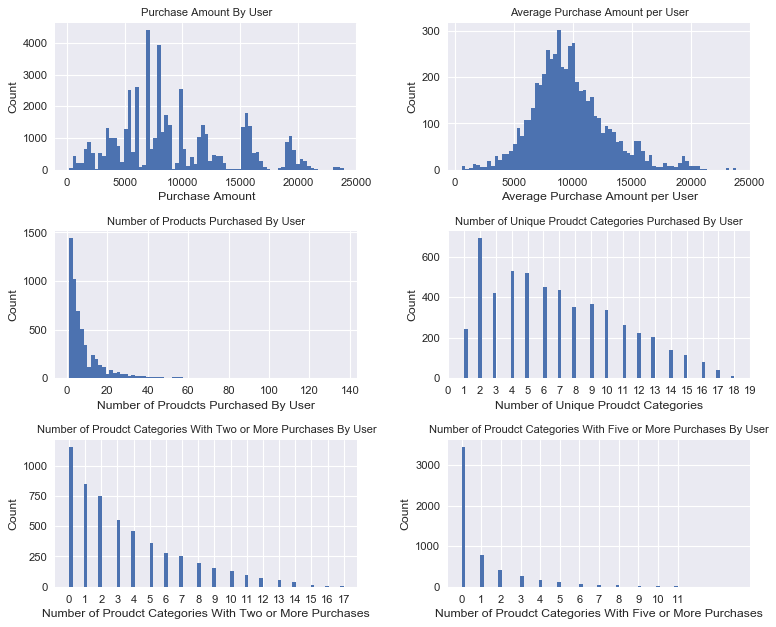

In [48]:
# Plots the following: Purchase about per user, Average purchase amount 
# per user, number of purchases per user, Number of unique categories 
# purchased per user, Number of 2+ categories purchased per user, Number 
# of 5+ categories purchased per user

plt.gcf().clear()

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# Purchase amount by user
plt.subplot(3,2,1)
trainDf['Purchase_Amount'].hist(bins=75)
plt.xlabel('Purchase Amount')
plt.ylabel('Count')
plt.title('Purchase Amount By User', fontsize = 10)

# Histogram of average purchase amount by user
plt.subplot(3,2,2)
trainDf.groupby(by='User_ID')['AvgPurchaseAmount'].mean().hist(bins=75)
plt.xlabel('Average Purchase Amount per User')
plt.ylabel('Count')
plt.title('Average Purchase Amount per User', fontsize = 10)

# Total number of purchases by user
plt.subplot(3,2,3)
trainDf.groupby(by='User_ID')['NumberPurchasesUser'].mean().hist(bins=75)
plt.xlabel('Number of Proudcts Purchased By User')
plt.ylabel('Count')
plt.title('Number of Products Purchased By User', fontsize = 10)

# Number of unique categories purchased per user
plt.subplot(3,2,4)
trainDf.groupby(by='User_ID')['Unqiue_Cat_Count'].mean().hist(bins=75)
plt.xlabel('Number of Unique Proudct Categories')
x = range(0,20)
plt.xticks(x)
plt.ylabel('Count')
plt.title('Number of Unique Proudct Categories Purchased By User', fontsize = 10)

# Number of unique categories purchased per user
plt.subplot(3,2,5)
trainDf.groupby(by='User_ID')['Two+_Cat_Count'].mean().hist(bins=75)
plt.xlabel('Number of Proudct Categories With Two or More Purchases')
x = range(0,18)
plt.xticks(x)
plt.ylabel('Count')
plt.title('Number of Proudct Categories With Two or More Purchases By User', fontsize = 10)

# Number of unique categories purchased per user
plt.subplot(3,2,6)
trainDf.groupby(by='User_ID')['Five+_Cat_Count'].mean().hist(bins=75)
plt.xlabel('Number of Proudct Categories With Five or More Purchases')
x = range(0,12)
plt.xticks(x)
plt.ylabel('Count')
plt.title('Number of Proudct Categories With Five or More Purchases By User', fontsize = 10)


plt.tight_layout()


plt.show()

There appears to be clustering for purchase amount by user. This might
suggest clusters of product or product groupings that cost similar amounts
Average purchase amount per user seems to be close to normally distributed
The number of products purchased by user seems to decline along an 
expontential curve
Two unique product category purchases per user is the most common number
Even greater than one product category which seems unusual. It generally 
follows a downward trend with a few anomolies being 3 and 8 having fewer
than expected
Both number of product categories with 2+ and 5+ purchases follows a 
downward trend. 2+ follows a more gradual downward trend, whereas 5+
drops off significantly after 0. 

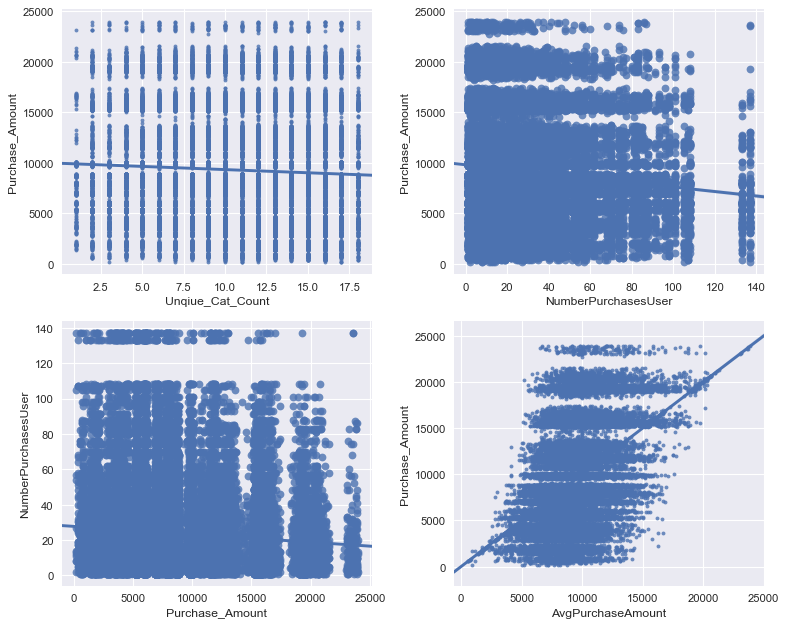

In [49]:
import seaborn as sns
#Numeric variables

#Purchase_Amount
#AvgPurchaseAmount
#NumberPurchasesUser
#unq_cats_prch_user
#two_plus_cats_prch_user
#cats_five_plus
             

plt.gcf().clear()

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2,2,1)
sns.regplot(trainDf['Unqiue_Cat_Count'], trainDf['Purchase_Amount'], marker='.')

plt.subplot(2,2,2)
sns.regplot(trainDf['NumberPurchasesUser'], trainDf['Purchase_Amount'])

plt.subplot(2,2,3)
sns.regplot(trainDf['Purchase_Amount'], trainDf['NumberPurchasesUser'])

plt.subplot(2,2,4)
sns.regplot(trainDf['AvgPurchaseAmount'], trainDf['Purchase_Amount'], marker='.')


plt.tight_layout()
plt.show()

This data set does not scatter plot well due to its lack of continuous data types. There is only six numeric data types and of the six only two are continuous: purchase amount and average purchase amount. The other four numeric categories fall on integers in the range of 0 to 20. 

The one plot that appears decent is purchase amount by average purchase amount which has a clear positive correlation. As the purchase amount increases the average purchases amount with the associated user also increases. There seems to be a weak negative correlation between purchase amount and number of purchases per user. The less the purchase amount the greater the number of purchases per user. 


### Metrics by Gender

In [50]:
# Calculating metrics by gender grouping

gender = trainDf.columns[12:14]

genderDfs = {}
genderLst = []

for item in gender:
    genderDfs[item] = trainDf[trainDf[item]==1]
    genderLst.append(trainDf[trainDf[item]==1])
    
genderStats = {}

for key, value in genderDfs.items():
    #loop through each gender data frame
    print(key, "\n \n", value.head())
    
    temps = {}
    
    temps['AveragePurchaseAmount'] = np.mean(value['Purchase_Amount'])
    
    temps['TotalPurchaseAmount'] = value.Purchase_Amount.sum()

    temps['NumberPurchases'] = value.Purchase_Amount.count()

    temps['AverageNumberPurchases'] = np.mean(value.groupby(by='User_ID')['Purchase_Amount'].count())

    temps['AverageTotalPurchaseAmount'] = value.groupby(by='User_ID')['Purchase_Amount'].sum().mean()

    temps['MaxPurchaseAmountUsers'] = np.max(value['Purchase_Amount'])
    
    temps['MinPurchaseAmountUsers'] = np.min(value['Purchase_Amount'])
    
    temps['MaxNumberPurchasesUsers'] = np.max(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    temps['MinNumberPurchasesUsers'] = np.min(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    
    genderStats[key] = temps
       
i = 0

for key, value in genderStats.items():
    print(key, "\n")
    
    print(genderLst[i].Purchase_Amount.describe(), "\n")
    i += 1
    
    
    for k, v in value.items():
        print(k, ": ", v)
    print('\n')
    

Female 
 
    User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000001  P00085942      F  0-17          10             A   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                          2               0                   2   

   Product_Category_2       ...         OccupationNew_9-11  \
0                   0       ...                        1.0   
1                   6       ...                        1.0   
2        

### Visualizations by Gender

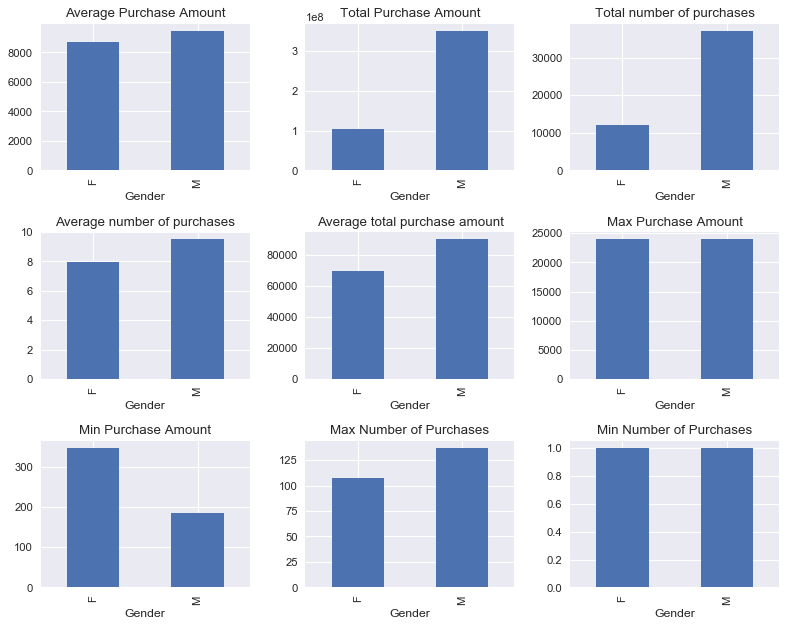

In [51]:
plt.gcf().clear()
import seaborn as sns

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#Plots Average Purchase Amount By Gender
plt.subplot(3,3,1)
df = trainDf.groupby(by='Gender')['Purchase_Amount'].mean()
df.plot(kind='bar', title='Average Purchase Amount')

#Plots Total Purchase Amount By Gender
plt.subplot(3,3,2)
df = trainDf.groupby(by='Gender')['Purchase_Amount'].sum()
df.plot(kind='bar', title = 'Total Purchase Amount')

#Plots Total Number of Purchases By Gender
plt.subplot(3,3,3)
df = trainDf.groupby(by=['Gender'])['Purchase_Amount'].count()
df.plot(kind='bar', title = 'Total number of purchases')

#Plots Average Number of Purchases By Gender
plt.subplot(3,3,4)
tempDf = trainDf
df0 = trainDf.groupby(by='User_ID')['Purchase_Amount'].count().to_frame().reset_index()
df0.columns = ["User_ID", 'NumberPurchaseCount']
df1 = tempDf.merge(df0, on='User_ID')
df2 = df1.groupby(by = ["Gender","User_ID"])['NumberPurchaseCount'].mean()
df3 = df2.groupby('Gender').mean()
df3.plot(kind='bar', title ='Average number of purchases')

#Plots Average Total Purchase Amount By Gender
plt.subplot(3,3,5)
df = trainDf.groupby(by=['Gender','User_ID'])['Purchase_Amount'].sum()
df2 = df.groupby(by='Gender').mean()
df2.plot(kind='bar', title='Average total purchase amount')

#Plots Maximumn Purchase Amount By Gender
plt.subplot(3,3,6)
df = trainDf.groupby('Gender')['Purchase_Amount'].max()
df.plot(kind='bar', title='Max Purchase Amount')


#Plots Minimum Purchase Amount by Gender
plt.subplot(3,3,7)
df = trainDf.groupby('Gender')['Purchase_Amount'].min()
df.plot(kind='bar', title='Min Purchase Amount')

#Plots Maximumn Number of Purchases By Gender
plt.subplot(3,3,8)
df = trainDf.groupby(by = ['Gender','User_ID'])['Purchase_Amount'].count()
df1 = df.groupby('Gender').max()
df1.plot(kind='bar', title='Max Number of Purchases')

#Plots Minimum Number of Purchases By Gender
plt.subplot(3,3,9)
df = trainDf.groupby(by = ['Gender','User_ID'])['Purchase_Amount'].count()
df1 = df.groupby('Gender').min()
df1.plot(kind='bar', title='Min Number of Purchases')

plt.tight_layout()
plt.show()

The average purchase amount, average number of purchases and average total purchase amount are marginally higher for males than females, but the total purchase amount and the total number of purchases is roughly 3 times larger by males than females suggesting that males are the primary purchasers on this particular online retailer. The max purchase amount is equal for the genders, but the minimum purchase amount is about 2 times small for men than for women. The maximum number of purchases is roughly 25% higher for men and the minimum number of purchases for both purchases is one. 

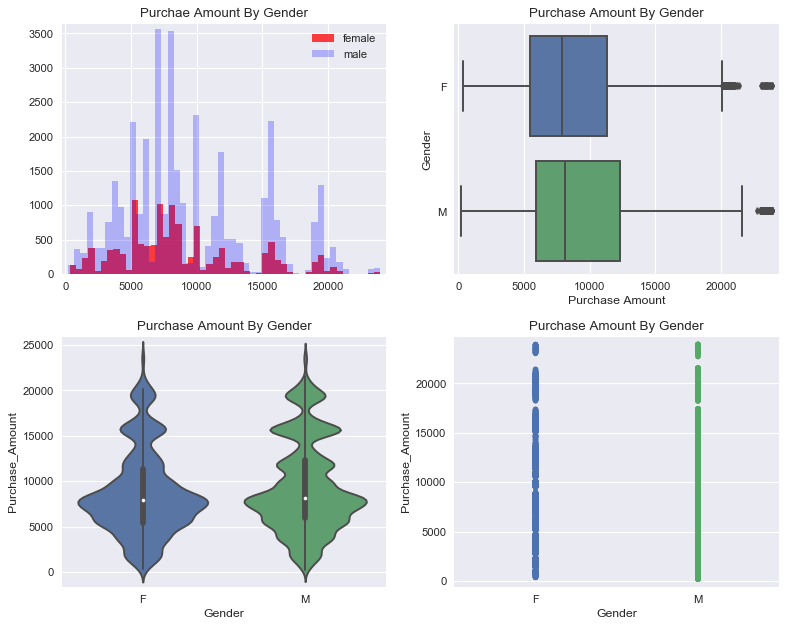

In [52]:
plt.gcf().clear()
import seaborn as sns

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# Histogram of purchase amount by gender
plt.subplot(2,2,1)
genderDfs['Female']['Purchase_Amount'].hist(bins = 50, alpha=.75, label='female', color='red')
genderDfs['Male']['Purchase_Amount'].hist(bins = 50, alpha=.25, label='male', color='blue')
plt.title('Purchae Amount By Gender')
plt.legend(loc = 'upper right')
plt.margins(.02)

#Box and whiskers of purchase amount by gender
plt.subplot(2,2,2)
sns.boxplot(x = 'Purchase_Amount', y = 'Gender', data=trainDf)
plt.xlabel('Purchase Amount')
plt.ylabel('Gender')
plt.title('Purchase Amount By Gender')
plt.margins(.02)

#Violin plot of purchase amount by gender
plt.subplot(2,2,3)
sns.violinplot(x='Gender', y='Purchase_Amount', data=trainDf)
plt.title('Purchase Amount By Gender')
plt.margins(.02)

# Strip plot of purchase amount by gender
plt.subplot(2,2,4)
sns.stripplot(x= 'Gender', y= 'Purchase_Amount', data = trainDf)
plt.title('Purchase Amount By Gender')
plt.margins(.02)

plt.tight_layout()


plt.show()

Purchase amount by gender bar, box, violin, and strip

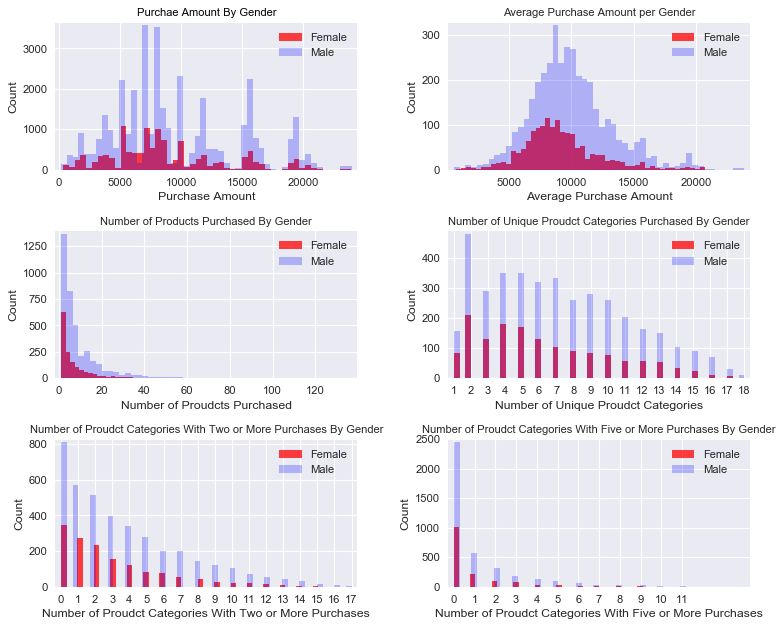

In [53]:
plt.gcf().clear()

colors = ['red', 'blue']
alpha = [.75, .25]
xlabels = []
ylabels = []
titles = []

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='white', edgecolor='k')

i = 0
for key, value in genderDfs.items():
    #print(key)
    #print(value)
    
    #Purchase amount by
    plt.subplot(3,2,1)
    value['Purchase_Amount'].hist(bins = 50, alpha= alpha[i], label = key, color = colors[i])
    plt.xlabel('Purchase Amount')
    plt.ylabel('Count')
    plt.title('Purchae Amount By Gender',color='black', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Average purchase amount by
    plt.subplot(3,2,2)
    value.groupby(by='User_ID')['AvgPurchaseAmount'].mean().hist(bins = 50, alpha= alpha[i], label = key, color = colors[i])
    plt.xlabel('Average Purchase Amount')
    plt.ylabel('Count')
    plt.title('Average Purchase Amount per Gender', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Total number of purchases by
    plt.subplot(3,2,3)
    value.groupby(by='User_ID')['NumberPurchasesUser'].mean().hist(bins = 50, alpha= alpha[i], label = key, color = colors[i])
    plt.xlabel('Number of Proudcts Purchased')
    plt.ylabel('Count')
    plt.title('Number of Products Purchased By Gender', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)

    # Number of unique categories purchased by
    plt.subplot(3,2,4)
    value.groupby(by='User_ID')['Unqiue_Cat_Count'].mean().hist(bins = 50, alpha= alpha[i], label = key, color = colors[i])
    plt.xlabel('Number of Unique Proudct Categories')
    x = range(0,20)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Unique Proudct Categories Purchased By Gender', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Number of categories with two or more purchases
    plt.subplot(3,2,5)
    value.groupby(by='User_ID')['Two+_Cat_Count'].mean().hist(bins = 50, alpha= alpha[i], label = key, color = colors[i])
    plt.xlabel('Number of Proudct Categories With Two or More Purchases')
    x = range(0,18)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Proudct Categories With Two or More Purchases By Gender', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Number of categories with five or more purchases
    plt.subplot(3,2,6)
    value.groupby(by='User_ID')['Five+_Cat_Count'].mean().hist(bins = 50, alpha= alpha[i], label = key, color = colors[i])
    plt.xlabel('Number of Proudct Categories With Five or More Purchases')
    x = range(0,12)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Proudct Categories With Five or More Purchases By Gender', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    plt.tight_layout()
    i +=1

plt.show()

The overlay of average purchase amount per gender shows similar mean purchase amounts for the genders, but roughly three times as many purchases for males than for females. 

### Metrics by Age Range

In [18]:
ages = trainDf.columns[14:21]

ageDfs = {}
agelst = []

for item in ages:
    ageDfs[item] = trainDf[trainDf[item]==1]
    agelst.append(trainDf[trainDf[item]==1])

ageStats = {}    
    
for key, value in ageDfs.items():
    
    temps = {}

    temps['AveragePurchaseAmount'] = np.mean(value['Purchase_Amount'])

    temps['TotalPurchaseAmount'] = value.Purchase_Amount.sum()

    temps['NumberPurchases'] = value.Purchase_Amount.count()

    temps['AverageNumberPurchases'] = np.mean(value.groupby(by='User_ID')['Purchase_Amount'].count())

    temps['AverageTotalPurchaseAmount'] = value.groupby(by='User_ID')['Purchase_Amount'].sum().mean()
   
    temps['MaxPurchaseAmountUsers'] = np.max(value['Purchase_Amount'])
    
    temps['MinPurchaseAmountUsers'] = np.min(value['Purchase_Amount'])
    
    temps['MaxNumberPurchasesUsers'] = np.max(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    temps['MinNumberPurchasesUsers'] = np.min(value.groupby(by='User_ID')['Purchase_Amount'].count())

    ageStats[key] = temps

i = 0

for key, value in ageStats.items():
    
    print(key, "\n")
    print(agelst[i].Purchase_Amount.describe(), "\n")
    i += 1
    
    for k, v in value.items():
        print(k, ": ", v)
    print('\n')   
        

Age_0-17 

count     1401.000000
mean      9094.816560
std       5091.135583
min        575.000000
25%       5353.000000
50%       8070.000000
75%      12074.000000
max      23847.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9094.816559600285
TotalPurchaseAmount :  12741838
NumberPurchases :  1401
AverageNumberPurchases :  6.935643564356436
AverageTotalPurchaseAmount :  63078.40594059406
MaxPurchaseAmountUsers :  23847
MinPurchaseAmountUsers :  575
MaxNumberPurchasesUsers :  98
MinNumberPurchasesUsers :  1


Age_18-25 

count     9390.000000
mean      9183.259957
std       4983.408975
min        347.000000
25%       5423.000000
50%       8015.500000
75%      12031.250000
max      23897.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9183.259957401491
TotalPurchaseAmount :  86230811
NumberPurchases :  9390
AverageNumberPurchases :  9.542682926829269
AverageTotalPurchaseAmount :  87632.93800813008
MaxPurchaseAmountUsers :  23897
MinPurch

In [19]:
i = 0
for key, value in ageStats.items():
    
    print(key, "\n")
    print(agelst[i].Purchase_Amount.describe(), "\n")
    i += 1
    
    for k, v in value.items():
        print(k, ": ", v)
    print('\n')   

Age_0-17 

count     1401.000000
mean      9094.816560
std       5091.135583
min        575.000000
25%       5353.000000
50%       8070.000000
75%      12074.000000
max      23847.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9094.816559600285
TotalPurchaseAmount :  12741838
NumberPurchases :  1401
AverageNumberPurchases :  6.935643564356436
AverageTotalPurchaseAmount :  63078.40594059406
MaxPurchaseAmountUsers :  23847
MinPurchaseAmountUsers :  575
MaxNumberPurchasesUsers :  98
MinNumberPurchasesUsers :  1


Age_18-25 

count     9390.000000
mean      9183.259957
std       4983.408975
min        347.000000
25%       5423.000000
50%       8015.500000
75%      12031.250000
max      23897.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9183.259957401491
TotalPurchaseAmount :  86230811
NumberPurchases :  9390
AverageNumberPurchases :  9.542682926829269
AverageTotalPurchaseAmount :  87632.93800813008
MaxPurchaseAmountUsers :  23897
MinPurch

### Visualization by Age Range

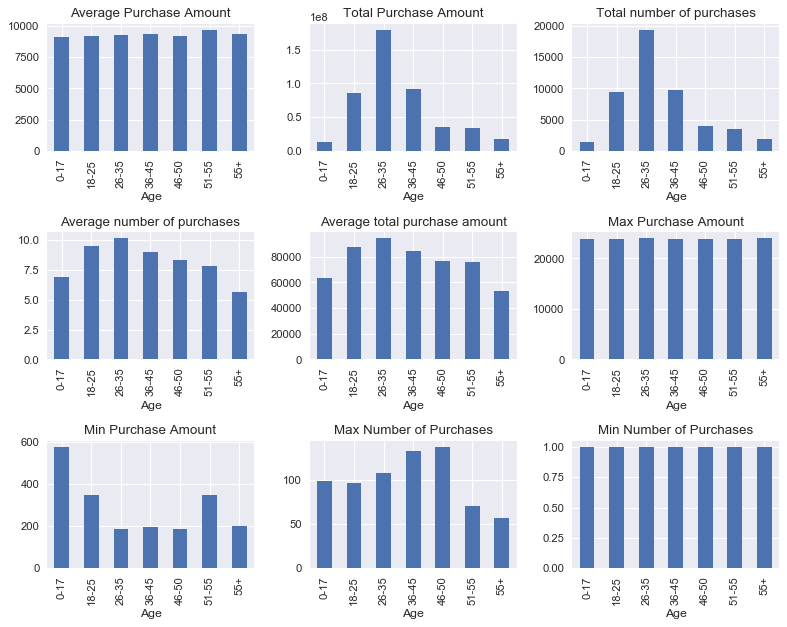

In [20]:
plt.gcf().clear()
import seaborn as sns

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#Plots Average Purchase Amount By age
plt.subplot(3,3,1)
df = trainDf.groupby(by='Age')['Purchase_Amount'].mean()
df.plot(kind='bar', title='Average Purchase Amount')

#Plots Total Purchase Amount By age
plt.subplot(3,3,2)
df = trainDf.groupby(by='Age')['Purchase_Amount'].sum()
df.plot(kind='bar', title = 'Total Purchase Amount')

#Plots Total Number of Purchases By age
plt.subplot(3,3,3)
df = trainDf.groupby(by=['Age'])['Purchase_Amount'].count()
df.plot(kind='bar', title = 'Total number of purchases')

#Plots Average Number of Purchases By age
plt.subplot(3,3,4)
tempDf = trainDf
df0 = trainDf.groupby(by='User_ID')['Purchase_Amount'].count().to_frame().reset_index()
df0.columns = ["User_ID", 'NumberPurchaseCount']
df1 = tempDf.merge(df0, on='User_ID')
df2 = df1.groupby(by = ["Age","User_ID"])['NumberPurchaseCount'].mean()
df3 = df2.groupby('Age').mean()
df3.plot(kind='bar', title ='Average number of purchases')

#Plots Average Total Purchase Amount By age
plt.subplot(3,3,5)
df = trainDf.groupby(by=['Age','User_ID'])['Purchase_Amount'].sum()
df2 = df.groupby(by='Age').mean()
df2.plot(kind='bar', title='Average total purchase amount')

#Plots Maximumn Purchase Amount By age
plt.subplot(3,3,6)
df = trainDf.groupby('Age')['Purchase_Amount'].max()
df.plot(kind='bar', title='Max Purchase Amount')


#Plots Minimum Purchase Amount by age
plt.subplot(3,3,7)
df = trainDf.groupby('Age')['Purchase_Amount'].min()
df.plot(kind='bar', title='Min Purchase Amount')

#Plots Maximumn Number of Purchases By age
plt.subplot(3,3,8)
df = trainDf.groupby(by = ['Age','User_ID'])['Purchase_Amount'].count()
df1 = df.groupby('Age').max()
df1.plot(kind='bar', title='Max Number of Purchases')

#Plots Minimum Number of Purchases By age
plt.subplot(3,3,9)
df = trainDf.groupby(by = ['Age','User_ID'])['Purchase_Amount'].count()
df1 = df.groupby('Age').min()
df1.plot(kind='bar', title='Min Number of Purchases')

plt.tight_layout()
plt.show()

The average purchase amount is similar across age ranges, but the total purchase amount and number of purchases varies dramatically with the age range. Age range 26-35 far out purchases all other age ranges and 18-25 and 36-45 have similar total purchase amounts tying for second place. The remaining age ranges purchase far less. The average number of purchases and average total purchase have similar ordering of age ranges in terms of quantity but the quantities are much closer together. 


['Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+']
<class 'list'>
Age_0-17


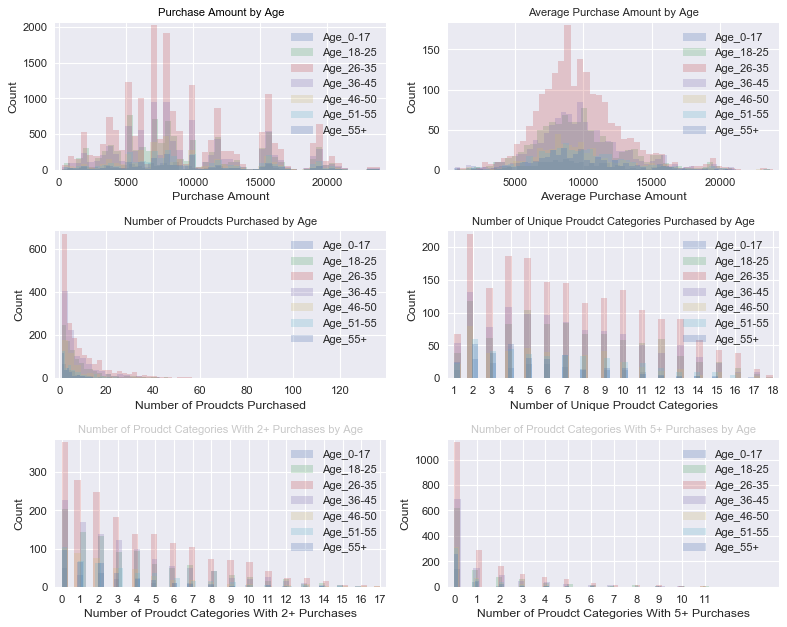

In [21]:
plt.gcf().clear()

#colors = ['red', 'blue']
alpha = .25
titles = trainDf.columns[14:21].tolist()
print(titles)
print(type(titles))
print(titles[0])
ylabels = []
titles = []

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='white', edgecolor='k')

i = 0
for key, value in ageDfs.items():
    #print(key)
    #print(value)
    #print(titles[i])
    
    #Purchase amount by
    plt.subplot(3,2,1)
    value['Purchase_Amount'].hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Purchase Amount')
    plt.ylabel('Count')
    plt.title('Purchase Amount by Age',color='black', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Average purchase amount by
    plt.subplot(3,2,2)
    value.groupby(by='User_ID')['AvgPurchaseAmount'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Average Purchase Amount')
    plt.ylabel('Count')
    plt.title('Average Purchase Amount by Age', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Total number of purchases by
    plt.subplot(3,2,3)
    value.groupby(by='User_ID')['NumberPurchasesUser'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Proudcts Purchased')
    plt.ylabel('Count')
    plt.title('Number of Proudcts Purchased by Age', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)

    # Number of unique categories purchased by
    plt.subplot(3,2,4)
    value.groupby(by='User_ID')['Unqiue_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Unique Proudct Categories')
    x = range(0,20)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Unique Proudct Categories Purchased by Age', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Number of categories with two or more purchases
    plt.subplot(3,2,5)
    value.groupby(by='User_ID')['Two+_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Proudct Categories With 2+ Purchases')
    x = range(0,18)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Proudct Categories With 2+ Purchases by Age', fontsize = 10, alpha=alpha)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Number of categories with five or more purchases
    plt.subplot(3,2,6)
    value.groupby(by='User_ID')['Five+_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Proudct Categories With 5+ Purchases')
    x = range(0,12)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Proudct Categories With 5+ Purchases by Age', fontsize = 10, alpha=alpha)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    plt.tight_layout()
    i +=1

plt.show()

### Statistics By Occupation

In [22]:
print(trainDf.columns[21:42]) #selects only occupation columns

Index(['0_Occupation', '1_Occupation', '2_Occupation', '3_Occupation',
       '4_Occupation', '5_Occupation', '6_Occupation', '7_Occupation',
       '8_Occupation', '9_Occupation', '10_Occupation', '11_Occupation',
       '12_Occupation', '13_Occupation', '14_Occupation', '15_Occupation',
       '16_Occupation', '17_Occupation', '18_Occupation', '19_Occupation',
       '20_Occupation'],
      dtype='object')


In [23]:
occupations = trainDf.columns[21:42]

OccupationDfs = {}
Occupationslst = []

for item in occupations:
    OccupationDfs[item] = trainDf[trainDf[item]==1]
    Occupationslst.append(trainDf[trainDf[item]==1])

OccupationStats = {}

for key, value in OccupationDfs.items():
    #loop through each occupation data frame
    #print(key, "\n \n", value.head())
    
    temps = {}

    temps['AveragePurchaseAmount'] = np.mean(value['Purchase_Amount'])

    temps['TotalPurchaseAmount'] = value.Purchase_Amount.sum()

    temps['NumberPurchases'] = value.Purchase_Amount.count()

    temps['AverageNumberPurchases'] = np.mean(value.groupby(by='User_ID')['Purchase_Amount'].count())

    temps['AverageTotalPurchaseAmount'] = value.groupby(by='User_ID')['Purchase_Amount'].sum().mean()
    
    temps['MaxPurchaseAmountUsers'] = np.max(value['Purchase_Amount'])
    
    temps['MinPurchaseAmountUsers'] = np.min(value['Purchase_Amount'])
    
    temps['MaxNumberPurchasesUsers'] = np.max(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    temps['MinNumberPurchasesUsers'] = np.min(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    OccupationStats[key] = temps

i = 0

for key, value in OccupationStats.items():
    print(key, "\n")
    
    print(Occupationslst[i].Purchase_Amount.describe(), "\n")
    i += 1
    
    
    for k, v in value.items():
        print(k, ": ", v)
    print('\n')

0_Occupation 

count     6249.000000
mean      9105.324852
std       4868.071300
min        371.000000
25%       5473.000000
50%       8004.000000
75%      11922.000000
max      23958.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9105.324851976316
TotalPurchaseAmount :  56899175
NumberPurchases :  6249
AverageNumberPurchases :  9.71850699844479
AverageTotalPurchaseAmount :  88490.1632970451
MaxPurchaseAmountUsers :  23958
MinPurchaseAmountUsers :  371
MaxNumberPurchasesUsers :  87
MinNumberPurchasesUsers :  1


1_Occupation 

count     4165.000000
mean      8905.612965
std       4684.829565
min        216.000000
25%       5845.000000
50%       7952.000000
75%      11603.000000
max      23899.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  8905.612965186074
TotalPurchaseAmount :  37091878
NumberPurchases :  4165
AverageNumberPurchases :  8.805496828752643
AverageTotalPurchaseAmount :  78418.3467230444
MaxPurchaseAmountUsers :  23899
MinP

### Visualization By Occupation

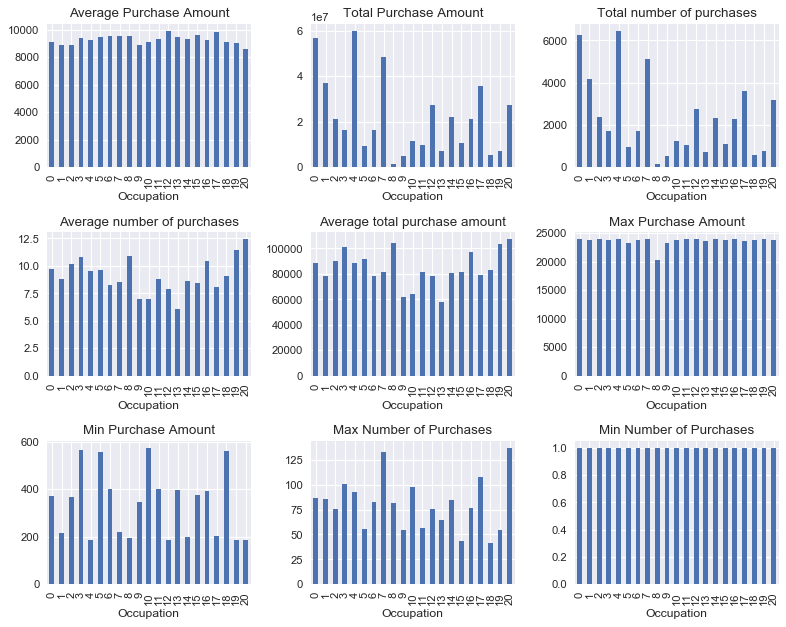

In [24]:
plt.gcf().clear()
import seaborn as sns

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#Plots Average Purchase Amount By occupation
plt.subplot(3,3,1)
df = trainDf.groupby(by='Occupation')['Purchase_Amount'].mean()
df.plot(kind='bar', title='Average Purchase Amount')

#Plots Total Purchase Amount By occupation
plt.subplot(3,3,2)
df = trainDf.groupby(by='Occupation')['Purchase_Amount'].sum()
df.plot(kind='bar', title = 'Total Purchase Amount')

#Plots Total Number of Purchases By occupation
plt.subplot(3,3,3)
df = trainDf.groupby(by=['Occupation'])['Purchase_Amount'].count()
df.plot(kind='bar', title = 'Total number of purchases')

#Plots Average Number of Purchases By occupation
plt.subplot(3,3,4)
tempDf = trainDf
df0 = trainDf.groupby(by='User_ID')['Purchase_Amount'].count().to_frame().reset_index()
df0.columns = ["User_ID", 'NumberPurchaseCount']
df1 = tempDf.merge(df0, on='User_ID')
df2 = df1.groupby(by = ["Occupation","User_ID"])['NumberPurchaseCount'].mean()
df3 = df2.groupby('Occupation').mean()
df3.plot(kind='bar', title ='Average number of purchases')

#Plots Average Total Purchase Amount By occupation
plt.subplot(3,3,5)
df = trainDf.groupby(by=['Occupation','User_ID'])['Purchase_Amount'].sum()
df2 = df.groupby(by='Occupation').mean()
df2.plot(kind='bar', title='Average total purchase amount')

#Plots Maximumn Purchase Amount By occupation
plt.subplot(3,3,6)
df = trainDf.groupby('Occupation')['Purchase_Amount'].max()
df.plot(kind='bar', title='Max Purchase Amount')


#Plots Minimum Purchase Amount by occupation
plt.subplot(3,3,7)
df = trainDf.groupby('Occupation')['Purchase_Amount'].min()
df.plot(kind='bar', title='Min Purchase Amount')

#Plots Maximumn Number of Purchases By occupation
plt.subplot(3,3,8)
df = trainDf.groupby(by = ['Occupation','User_ID'])['Purchase_Amount'].count()
df1 = df.groupby('Occupation').max()
df1.plot(kind='bar', title='Max Number of Purchases')

#Plots Minimum Number of Purchases By occupation
plt.subplot(3,3,9)
df = trainDf.groupby(by = ['Occupation','User_ID'])['Purchase_Amount'].count()
df1 = df.groupby('Occupation').min()
df1.plot(kind='bar', title='Min Number of Purchases')

plt.tight_layout()
plt.show()

Average purchase amount, maximum purchase amount and minimum purchase amount seem to be relatively similar across the occupation. Total purchase amount and total number of purchases have a wide range of amounts and a near identical distribution. Occupations 0, 4 and 7 are the top three purchasing occupations and occupations 8, 18 and 19 are the bottom three purchasers with occupation 8 being significantly below even the second lowest purchaser. Average number of purchases and average total purchase amount follow a very different distribution suggesting that total purchase amount and total number of purchases reflect more on the number of people that fall within each occupation as oppose to the purchasing habits of people in each category. The Average number of purchases and average total purchase amount are more uniformly distributed and reflect more accurately the purchasing characteristics of an occupation. In both of these charts, occupation 8 has the second or third highest amount. 


['PurchaseAmount', 'AvgPurchaseAmount', 'NumberPurchasesUser', 'Unqiue_Cat_Count', 'Two+_Cat_Count', 'Five+_Cat_Count']


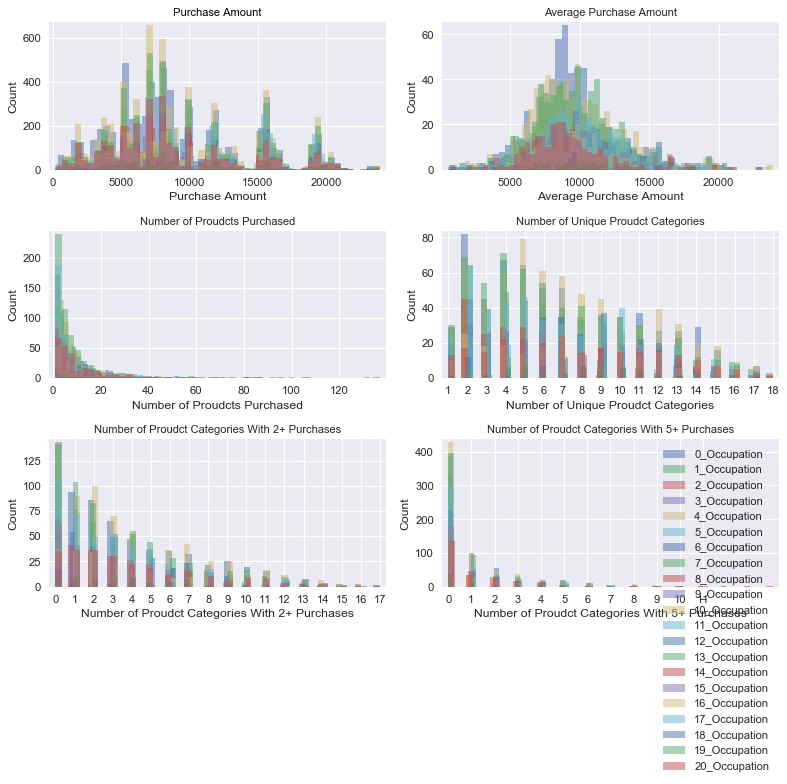

In [25]:
plt.gcf().clear()

hold = trainDf.columns[-5:].tolist()
temp = 'PurchaseAmount'
hold.insert(0, temp)
print(hold)
#colors = ['red', 'blue']
alpha = .5
titles = hold
ylabels = []

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='white', edgecolor='k')

#i = 0
for key, value in OccupationDfs.items():
    #print(key)
    #print(value)
    #print(titles[i])
    
    #Purchase amount by
    plt.subplot(3,2,1)
    value['Purchase_Amount'].hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Purchase Amount')
    plt.ylabel('Count')
    plt.title('Purchase Amount', color='black', fontsize = 10)
    #plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Average purchase amount by
    plt.subplot(3,2,2)
    value.groupby(by='User_ID')['AvgPurchaseAmount'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Average Purchase Amount')
    plt.ylabel('Count')
    plt.title('Average Purchase Amount', fontsize = 10)
    #plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Total number of purchases by
    plt.subplot(3,2,3)
    value.groupby(by='User_ID')['NumberPurchasesUser'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Proudcts Purchased')
    plt.ylabel('Count')
    plt.title('Number of Proudcts Purchased', fontsize = 10)
    #plt.legend(loc = 'upper right')
    plt.margins(.02)

    # Number of unique categories purchased by
    plt.subplot(3,2,4)
    value.groupby(by='User_ID')['Unqiue_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Unique Proudct Categories')
    x = range(0,20)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Unique Proudct Categories', fontsize = 10)
    #plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Number of categories with two or more purchases
    plt.subplot(3,2,5)
    value.groupby(by='User_ID')['Two+_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Proudct Categories With 2+ Purchases')
    x = range(0,18)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Proudct Categories With 2+ Purchases', fontsize = 10)
    #plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Number of categories with five or more purchases
    plt.subplot(3,2,6)
    value.groupby(by='User_ID')['Five+_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Proudct Categories With 5+ Purchases')
    x = range(0,12)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Proudct Categories With 5+ Purchases', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    plt.tight_layout()
    #i +=1

plt.show()

### Statistics By City Category

In [26]:
citycat = trainDf.columns[42:45]

citycatDfs = {}
citycatLst = []

for item in citycat:
    citycatDfs[item] = trainDf[trainDf[item]==1]
    citycatLst.append(trainDf[trainDf[item]==1])
    
citycatStats = {}
citycatStat = {}


for key, value in citycatDfs.items():
    #loop through each occupation data frame
    #print(key, "\n \n", value.head())
    
    tempS = {}
    temp = {}


    temps['AveragePurchaseAmount'] = np.mean(value['Purchase_Amount'])

    temps['TotalPurchaseAmount'] = value.Purchase_Amount.sum()

    temps['NumberPurchases'] = value.Purchase_Amount.count()

    temps['AverageNumberPurchases'] = np.mean(value.groupby(by='User_ID')['Purchase_Amount'].count())

    temps['AverageTotalPurchaseAmount'] = value.groupby(by='User_ID')['Purchase_Amount'].sum().mean()

    temps['MaxPurchaseAmountUsers'] = np.max(value['Purchase_Amount'])
    
    temps['MinPurchaseAmountUsers'] = np.min(value['Purchase_Amount'])
    
    temps['MaxNumberPurchasesUsers'] = np.max(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    temps['MinNumberPurchasesUsers'] = np.min(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    temp['AveragePurchaseAmountUser'] = value.groupby(by='User_ID')['Purchase_Amount'].mean()
    
    temp['NumberOfPurchasesUser'] = value.groupby(by='User_ID')['Purchase_Amount'].count().sort_values(ascending=False)
    
    citycatStats[key] = temps
    citycatStat[key] = temp

    
i = 0

for key, value in citycatStats.items():
    print(key, "\n")
    
    print(citycatLst[i].Purchase_Amount.describe(), "\n")
    i += 1
    
    
    for k, v in value.items():
        print(k, ": ", v)
    print('\n')

City_Category_A 

count    13873.000000
mean      8842.529446
std       4837.328960
min        185.000000
25%       5396.000000
50%       7903.000000
75%      11699.000000
max      23949.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9792.575636412103
TotalPurchaseAmount :  146947390
NumberPurchases :  15006
AverageNumberPurchases :  5.3288352272727275
AverageTotalPurchaseAmount :  52183.022017045456
MaxPurchaseAmountUsers :  23958
MinPurchaseAmountUsers :  187
MaxNumberPurchasesUsers :  36
MinNumberPurchasesUsers :  1


City_Category_B 

count    20245.000000
mean      9214.819610
std       4927.921076
min        188.000000
25%       5471.000000
50%       8025.000000
75%      12015.000000
max      23948.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9792.575636412103
TotalPurchaseAmount :  146947390
NumberPurchases :  15006
AverageNumberPurchases :  5.3288352272727275
AverageTotalPurchaseAmount :  52183.022017045456
MaxPurchaseAmountUs

### Visualization By City Category

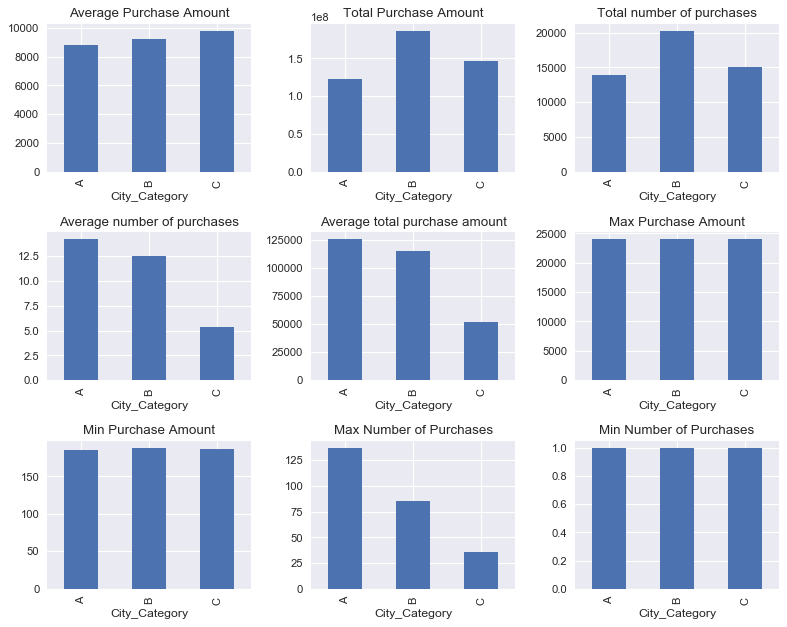

In [27]:
import seaborn as sns

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#Plots Average Purchase Amount By city category
plt.subplot(3,3,1)
df = trainDf.groupby(by='City_Category')['Purchase_Amount'].mean()
df.plot(kind='bar', title='Average Purchase Amount')

#Plots Total Purchase Amount By city category
plt.subplot(3,3,2)
df = trainDf.groupby(by='City_Category')['Purchase_Amount'].sum()
df.plot(kind='bar', title = 'Total Purchase Amount')

#Plots Total Number of Purchases By city category
plt.subplot(3,3,3)
df = trainDf.groupby(by=['City_Category'])['Purchase_Amount'].count()
df.plot(kind='bar', title = 'Total number of purchases')

#Plots Average Number of Purchases By city category
plt.subplot(3,3,4)
tempDf = trainDf
df0 = trainDf.groupby(by='User_ID')['Purchase_Amount'].count().to_frame().reset_index()
df0.columns = ["User_ID", 'NumberPurchaseCount']
df1 = tempDf.merge(df0, on='User_ID')
df2 = df1.groupby(by = ["City_Category","User_ID"])['NumberPurchaseCount'].mean()
df3 = df2.groupby('City_Category').mean()
df3.plot(kind='bar', title ='Average number of purchases')

#Plots Average Total Purchase Amount By city category
plt.subplot(3,3,5)
df = trainDf.groupby(by=['City_Category','User_ID'])['Purchase_Amount'].sum()
df2 = df.groupby(by='City_Category').mean()
df2.plot(kind='bar', title='Average total purchase amount')

#Plots Maximumn Purchase Amount By city category
plt.subplot(3,3,6)
df = trainDf.groupby('City_Category')['Purchase_Amount'].max()
df.plot(kind='bar', title='Max Purchase Amount')


#Plots Minimum Purchase Amount by city category
plt.subplot(3,3,7)
df = trainDf.groupby('City_Category')['Purchase_Amount'].min()
df.plot(kind='bar', title='Min Purchase Amount')

#Plots Maximumn Number of Purchases By city category
plt.subplot(3,3,8)
df = trainDf.groupby(by = ['City_Category','User_ID'])['Purchase_Amount'].count()
df1 = df.groupby('City_Category').max()
df1.plot(kind='bar', title='Max Number of Purchases')

#Plots Minimum Number of Purchases By city category
plt.subplot(3,3,9)
df = trainDf.groupby(by = ['City_Category','User_ID'])['Purchase_Amount'].count()
df1 = df.groupby('City_Category').min()
df1.plot(kind='bar', title='Min Number of Purchases')

plt.tight_layout()
plt.show()

City Category A has the lowest average purchase amount, total purchase amount and total number of purchases, yet the highest average number of purchases and average total purchase amount. This would suggest a higher spending (more affluent), less populated community. 

['PurchaseAmount', 'AvgPurchaseAmount', 'NumberPurchasesUser', 'Unqiue_Cat_Count', 'Two+_Cat_Count', 'Five+_Cat_Count']


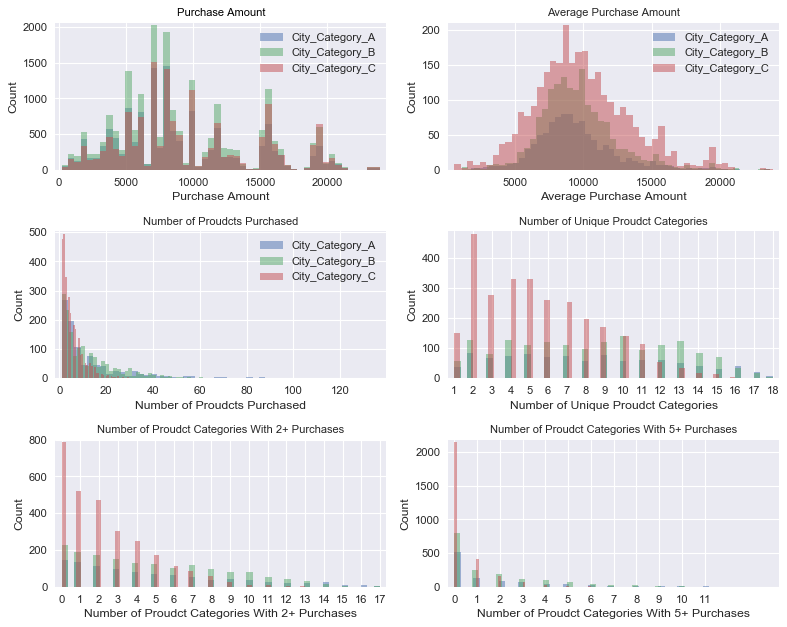

In [28]:
plt.gcf().clear()

hold = trainDf.columns[-5:].tolist()
temp = 'PurchaseAmount'
hold.insert(0, temp)
print(hold)
#colors = ['red', 'blue']
alpha = .5
titles = hold
ylabels = []

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='white', edgecolor='k')

#i = 0
for key, value in citycatDfs.items():
    #print(key)
    #print(value)
    #print(titles[i])
    
    #Purchase amount by
    plt.subplot(3,2,1)
    value['Purchase_Amount'].hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Purchase Amount')
    plt.ylabel('Count')
    plt.title('Purchase Amount', color='black', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Average purchase amount by
    plt.subplot(3,2,2)
    value.groupby(by='User_ID')['AvgPurchaseAmount'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Average Purchase Amount')
    plt.ylabel('Count')
    plt.title('Average Purchase Amount', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Total number of purchases by
    plt.subplot(3,2,3)
    value.groupby(by='User_ID')['NumberPurchasesUser'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Proudcts Purchased')
    plt.ylabel('Count')
    plt.title('Number of Proudcts Purchased', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)

    # Number of unique categories purchased by
    plt.subplot(3,2,4)
    value.groupby(by='User_ID')['Unqiue_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Unique Proudct Categories')
    x = range(0,20)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Unique Proudct Categories', fontsize = 10)
    #plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Number of categories with two or more purchases
    plt.subplot(3,2,5)
    value.groupby(by='User_ID')['Two+_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Proudct Categories With 2+ Purchases')
    x = range(0,18)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Proudct Categories With 2+ Purchases', fontsize = 10)
    #plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Number of categories with five or more purchases
    plt.subplot(3,2,6)
    value.groupby(by='User_ID')['Five+_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Proudct Categories With 5+ Purchases')
    x = range(0,12)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Proudct Categories With 5+ Purchases', fontsize = 10)
    #plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    plt.tight_layout()
    #i +=1

plt.show()

In [31]:
trainDf.to_csv('trainDfstats.csv', index=False)
testDf.to_csv('testDfstats.csv', index=False)

In [35]:
trainDf[['User_ID','Product_ID','Purchase_Amount']].sort_values('Product_ID')

,User_ID,Product_ID,Purchase_Amount
17875,1001383,P00000142,11050
34187,1003774,P00000142,8062
37292,1004215,P00000142,10737
14577,1001151,P00000142,10782
574,1000049,P00000142,13353
13489,1001094,P00000142,10728
31892,1003479,P00000142,7995
10860,1000889,P00000142,10745
17277,1001336,P00000142,13586
10155,1000843,P00000142,10577
